# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') #сохраняем в датафрейме data файл real_estate_data.csv из папки /datasets/, указав в качестве разделителя знак табуляции \t.
pd.set_option('display.max_columns', None)
data.info() #информация о датафрейме
data.head() #информация о первых 5 строках датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выводы по 1 пункту:
1. Данные в столбце first_day_exposition должны быть в формате datetime.  
2. В столбце ceiling_height есть пропущенные значения.
3. В столбце floors_total есть пропущенные значения и данные должны быть в формате int64 (целые числа).
4. В столбце living_area есть пропущенные значения.
5. В столбце is_apartment есть пропущенные значения и данные должны быть в формате bool(булевы значения).
6. В столбце kitchen_area есть пропущенные значения.
7. В столбце balcony есть пропущенные значения и данные должны быть в формате int64 (целые числа).
8. В столбце locality_name есть пропущенные значения.
9. В столбце airports_nearest есть пропущенные значения.
10. В столбце cityCenters_nearest есть пропущенные значения.
11. В столбце parks_around3000 есть пропущенные значения и данные должны быть в формате int64 (целые числа).
12. В столбце parks_nearest есть пропущенные значения.
13. В столбце ponds_around3000 есть пропущенные значения и данные должны быть в формате int64 (целые числа).
14. В столбце ponds_nearest есть пропущенные значения.
15. В столбце days_exposition есть пропущенные значения и данные должны быть в формате int64 (целые числа). 

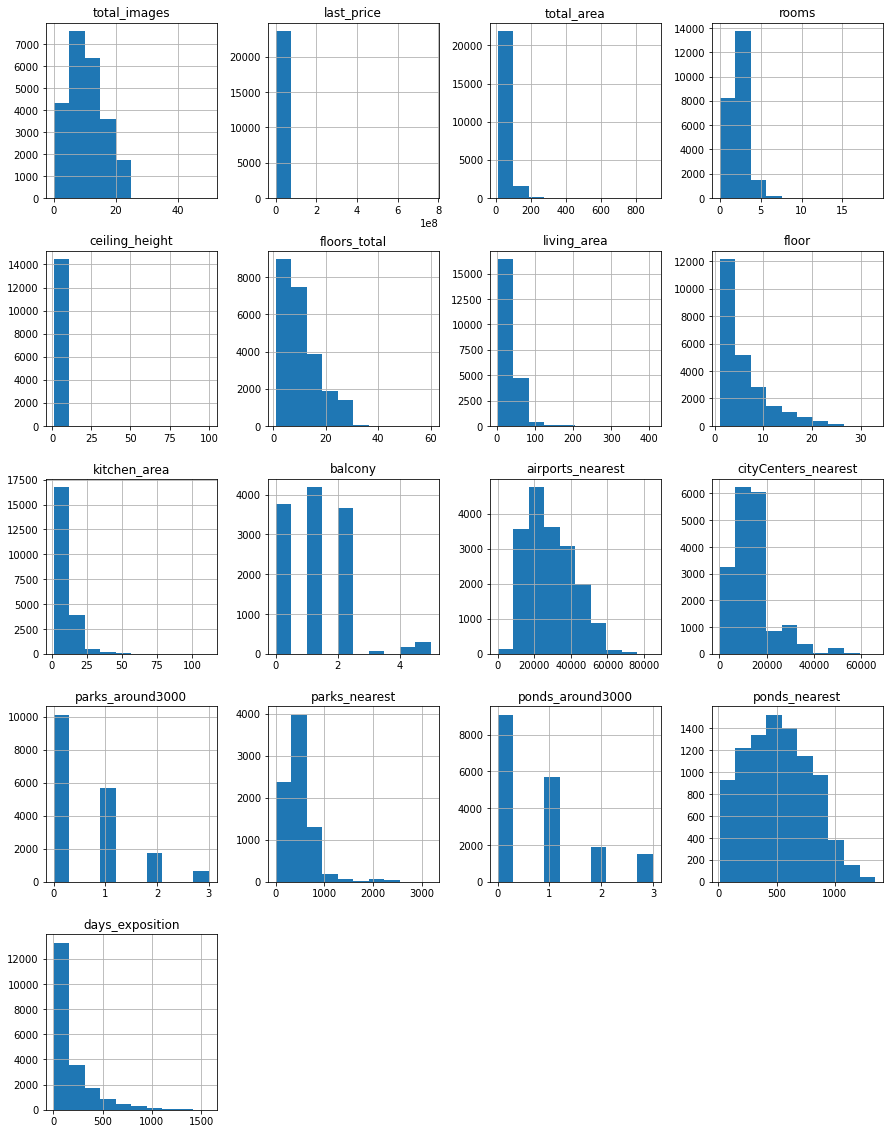

In [3]:
#построим общую гистограмму для всех столбцов таблицы
data.hist(figsize=(15, 20));

### Предобработка данных

In [4]:
# посчитаем явные дубликаты
data.duplicated().sum() #в датафрейме их нет

#посмотрим более подробно на значения в стобцах с пропущенными значениями

data['balcony'].value_counts() 
# вероятнее всего пропущенное значение означает отсутствие балкона
# заменим пропущенные значения на 0, приведем данные к формату int64 и сохраним.
data['balcony'] = data['balcony'].fillna(0).astype('int')

# Данные в столбце first_day_exposition переведем в формат datetime и сохраним.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

data['is_apartment'].value_counts() 
# вероятнее всего пропущенное значение означает квартиру (не равно апартаменты)
# заменим пропущенные значения на False, приведем данные к формату bool и сохраним.
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

# в столбцах ниже есть пропущенные значения, но заменить их ничем не возможно.Оставляем как есть.
data['ceiling_height'].value_counts() 
data['floors_total'].value_counts() 
data['living_area'].value_counts() 
data['locality_name'].value_counts() 
data['airports_nearest'].value_counts() 
data['cityCenters_nearest'].value_counts() 
data['parks_nearest'].value_counts() 
data['ponds_nearest'].value_counts() 
data['days_exposition'].value_counts() 
data['kitchen_area'].value_counts() 

# в столбцах floors_total и days_exposition невозможно привести данные к формату int64, 
# так как имеются пропущенные значения, которые нельзя заменить.

# в столбцах ниже пропущенные значения скорее всего означает отсутствие данных или ноль(парков или водоемов в радиусе 3 км)
# заменим пропущенные значения на 0, приведем данные к формату int64 и сохраним.
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int') 
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int') 

#приведем к нижнему регистру все названия населенных пунктов для сокращения неявных дубликатов.
data['locality_name'] = data['locality_name'].str.lower() 
# проверим уникальные значения в столбце locality_name
data['locality_name'].unique()
# обнаруженные неявные дубликаты заменим на уникальные значения
data['locality_name'] = data['locality_name'].replace('ё', 'е',regex=True)
data['locality_name'] = data['locality_name'].replace(['поселок городского типа''городской поселок'], 'поселок',regex=True)

# проверим уникальные значения в столбце ceiling_height
data['ceiling_height'].unique() 
# обнаружены аномальные значения: высота потолков в некоторых квартирах превышает 4 метра 
# рассчитаем сколько % составляют значения с высотой потолков более 4 метров.
len(data['ceiling_height'][data['ceiling_height'] >= 4.0])/len(data['ceiling_height'])*100
# отбросим значения с высотой потолков более 4 метров, поскольку они составляют 0,48% от всех значений в столбце ceiling_height
data['ceiling_height'] = data['ceiling_height'][data['ceiling_height'] < 4.0]

# в данных столбца last_price указано много знаков после запятой, такие значения неудобны для визуального восприятия
# сократим количество знаков после запятой до 0.
data['last_price'] = data['last_price'].astype('int')

In [5]:
#найдем медиану для столбца ceiling_height
data['ceiling_height'].median()

#заменим пропуски в столбце ceiling_height медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

In [6]:
# проверим уникальные значения в столбце rooms
data['rooms'].unique() 
# обнаружены аномальные значения: количество комнат в некоторых квартирах составляет 7 и более комнат 
# рассчитаем сколько % составляют значения с количеством комнат более 7.
len(data['rooms'][data['rooms'] >= 7])/len(data['rooms'])*100
# отбросим значения с количеством комнат более 7, поскольку они составляют 0,37% от всех значений в столбце rooms
data['rooms'] = data['rooms'][data['rooms'] <= 7.0]

# согласно гистограмме столбца living_area в датафрейме есть аномальные значения с общей площадью более 100 квадратных метров.
# рассчитаем сколько % составляют значения с общей площадью более 100 квадратных метров.
len(data['living_area'][data['living_area'] >= 100.0])/len(data['living_area'])*100
# отбросим значения с общей площадью более 100 квадратных метров, поскольку они составляют 1,53% от всех значений в столбце living_area
data['living_area'] = data['living_area'][data['living_area'] <= 100.0]

# проверим сколько уникальных значений в столбце last_price
data['last_price'].value_counts() 
# обнаружены аномальные значения: цена на некоторые квартиры превышает 11 млн рублей 
# рассчитаем сколько % составляют значения с ценой более 11 млн рублей
len(data['last_price'][data['last_price'] >= 11000000])/len(data['last_price'])*100
# отбросим значения с ценой более 11 млн рублей, поскольку они составляют менее 10% (9,86%) от всех значений в столбце last_price
data['last_price'] = data['last_price'][data['last_price'] <= 11000000]


### Посчитайте и добавьте в таблицу новые столбцы

In [7]:
# рассчитаем цену одного квадратного метра и добавим в датафрейм
data['price_of_one_square_meter'] = data['last_price']/data['total_area']

# рассчитаем день публикации объявления (0 - понедельник, 1 - вторник и т.д.) и добавим в датафрейм
data['day_of_publication'] = data['first_day_exposition'].dt.weekday

# рассчитаем месяц публикации объявления и добавим в датафрейм
data['month_of_publication'] = data['first_day_exposition'].dt.month

# рассчитаем год публикации объявления и добавим в датафрейм
data['year_of_publication'] = data['first_day_exposition'].dt.year

# рассчитаем тип этажа квартиры (значения — «первый», «последний», «другой») и добавим в датафрейм
def floor_type(row): 
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    if 1 < row['floor'] < row['floors_total']:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

# рассчитаем расстояние в км до центра города и добавим в датафрейм
#data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 100

# проверяем полученные данные
#data.head()    

In [8]:
# рассчитаем расстояние в км до центра города и добавим в датафрейм
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
# значения округлим до целого числа.
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round(0)

# проверяем полученные данные
data.head()    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_one_square_meter,day_of_publication,month_of_publication,year_of_publication,floor_type,cityCenters_nearest_km
0,20,NaN,108.0,2019-03-07,3.0,2.70,16.0,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,NaN,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1.0,2.65,11.0,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2.0,2.65,5.0,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,NaN,159.0,2015-07-24,3.0,2.65,14.0,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,NaN,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

#### Изучим более подробно параметры объектов:

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

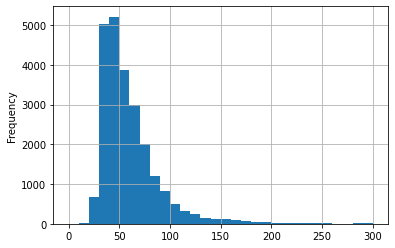

In [9]:
#построим гистограмму по данным столбца total_area
data['total_area'].sort_values().plot(y = 'total_area', kind = 'hist', bins = 30, range=(0,300), grid=True)
data['total_area'].describe()

Общая площадь большинства продаваемых квартир находится в диапазоне от 40 до 69 квадратных метров. Есть аномальные значения, но они не значительны.

count    21442.000000
mean        32.636450
std         15.823574
min          2.000000
25%         18.500000
50%         30.000000
75%         42.000000
max        100.000000
Name: living_area, dtype: float64

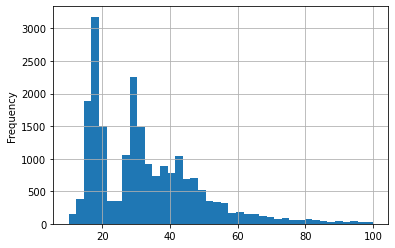

In [10]:
#построим гистограмму по данным столбца living_area
data['living_area'].sort_values().plot(y = 'living_area', kind = 'hist', bins = 40, range=(10,100), grid=True)
data['living_area'].describe()

Жилая площадь продаваемых квартир находится в диапазоне от 18 до 42 квадратных метров. Есть аномальные значения, но они не значительны.

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

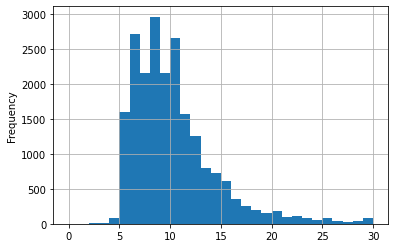

In [11]:
#построим гистограмму по данным столбца kitchen_area
data['kitchen_area'].sort_values().plot(y = 'kitchen_area', kind = 'hist', bins = 30, range=(0,30), grid=True)
data['kitchen_area'].describe()

Площадь кухни в продаваемых квартирах находится в диапазоне от 6 до 12 квадратных метров. Есть аномальные значения, но они не значительны.

count    2.141500e+04
mean     4.770791e+06
std      2.122018e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      5.950000e+06
max      1.100000e+07
Name: last_price, dtype: float64

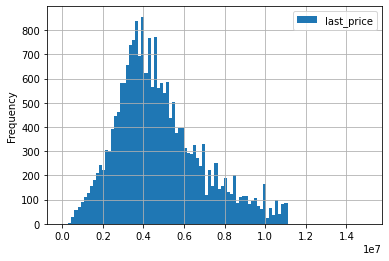

In [12]:
#построим гистограмму по данным столбца last_price
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000))
data['last_price'].describe()

Стоимость продаваемых квартир находится в диапазоне от 1,21 млн до 5,95 млн рублей. Значения выводятся в экспоненциальной записи чисел. Есть аномальные значения, но они не значительны.

count    23668.000000
mean         2.060250
std          1.035396
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

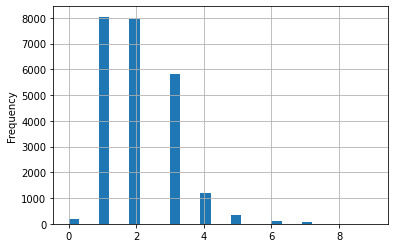

In [13]:
#построим гистограмму по данным столбца rooms
data['rooms'].sort_values().plot(y = 'rooms', kind = 'hist', bins = 30, range=(0,9), grid=True)
data['rooms'].describe()

Количество комнат в большинстве продаваемых квартир от 1 до 3. Есть аномальные значения, но они не значительны.

count    23699.000000
mean         2.690830
std          0.197986
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64

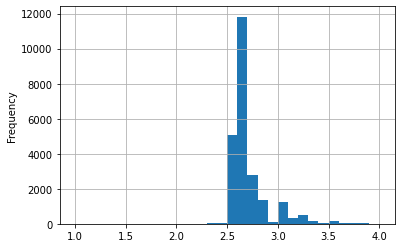

In [14]:
#построим гистограмму по данным столбца ceiling_height
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(1,4), grid=True)
data['ceiling_height'].describe()

Высота потолков в большинстве квартир находится в диапазоне от 2,6 до 2,7 метров.

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

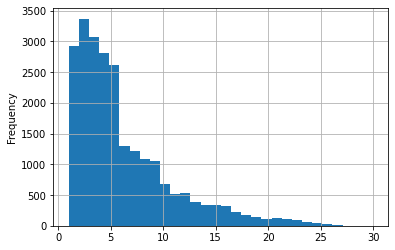

In [15]:
#построим гистограмму по данным столбца floor
data['floor'].sort_values().plot(y = 'floor', kind = 'hist', bins = 30, range=(1,30), grid=True)
data['floor'].describe()

Квартиры, в-основном, продаются с 2 по 8 этаж. Есть аномальные значения, но они не значительны.

count      23616
unique         3
top       другой
freq       17363
Name: floor_type, dtype: object

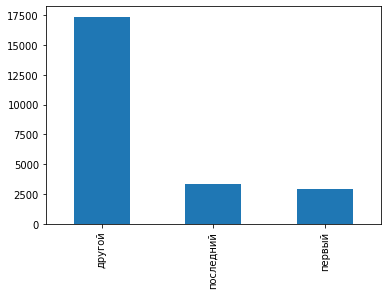

In [16]:
#построим гистограмму по данным столбца floor_type
data['floor_type'].value_counts().plot(y='floor_type', kind='bar')
data['floor_type'].describe()

Квартиры, расположенные на первом и последнем этажах, редко встречаются в датафрейме.

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

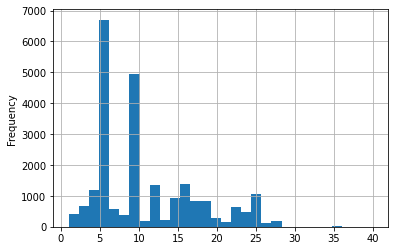

In [17]:
#построим гистограмму по данным столбца floors_total
data['floors_total'].sort_values().plot(y = 'floors_total', kind = 'hist', bins = 30, range=(1,40), grid=True)
data['floors_total'].describe()

Квартиры продаются по большей части в 5-этажных домах, на втором месте в 9-этажных домах. Есть аномальные значения, но они не значительны.

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

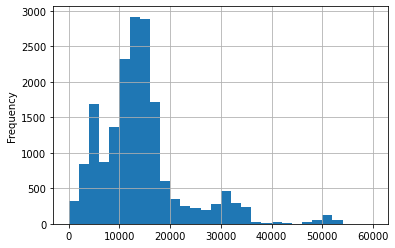

In [18]:
#построим гистограмму по данным столбца cityCenters_nearest
data['cityCenters_nearest'].sort_values().plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, range=(0,60000), grid=True)
data['cityCenters_nearest'].describe()

Удаленность от центра города у большинства продаваемых квартир составляет от 9,2 до 16,2 км. Есть аномальные значения, но они не значительны.

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

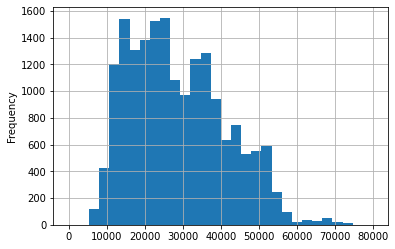

In [19]:
#построим гистограмму по данным столбца airports_nearest
data['airports_nearest'].sort_values().plot(y = 'airports_nearest', kind = 'hist', bins = 30, range=(0,80000), grid=True)
data['airports_nearest'].describe()

Удаленность от аэропорта у большинства продаваемых квартир составляет от 18 до 38 км. Есть аномальные значения, но они не значительны.

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

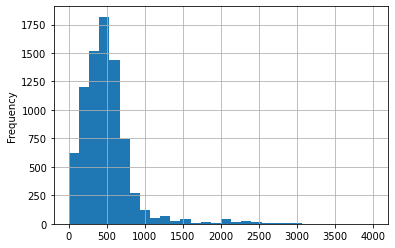

In [20]:
#построим гистограмму по данным столбца parks_nearest
data['parks_nearest'].sort_values().plot(y = 'parks_nearest', kind = 'hist', bins = 30, range=(0,4000), grid=True)
data['parks_nearest'].describe()

У большинства продаваемых квартир в пределах 612 метров есть парк. Есть аномальные значения, но они не значительны.

count    23699.000000
mean         2.569307
std          1.789082
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_publication, dtype: float64

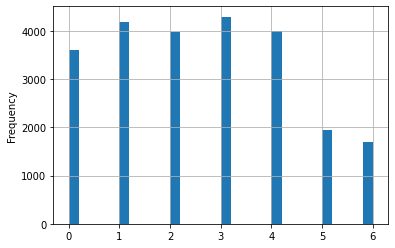

In [21]:
#построим гистограмму по данным столбца day_of_publication 
data['day_of_publication'].sort_values().plot(y = 'day_of_publication', kind = 'hist', bins = 30, range=(0,6), grid=True)
data['day_of_publication'].describe()

Объявления о продаже квартир чаще всего появляются в будние дни.

count    23699.000000
mean         6.400101
std          3.491561
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_of_publication, dtype: float64

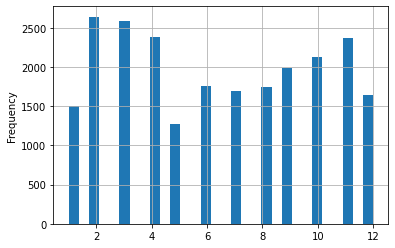

In [22]:
#построим гистограмму по данным столбца month_of_publication.
data['month_of_publication'].sort_values().plot(y = 'month_of_publication', kind = 'hist', bins = 30, range=(1,12), grid=True)
data['month_of_publication'].describe()

Объявления о продаже квартир чаще всего публикуются в период с февраля по апрель и с сентября по ноябрь.

#### Изучим, как быстро продавались квартиры:

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

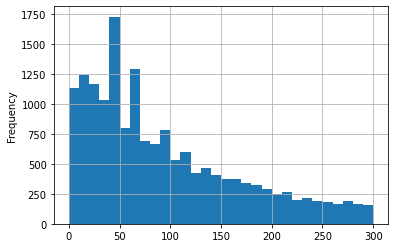

In [23]:
#построим гистограмму по данным столбца day_of_publication (Этот параметр показывает, сколько дней было размещено каждое объявление) 
data['days_exposition'].sort_values().plot(y = 'days_exposition', kind = 'hist', bins = 30, range=(0,300), grid=True)
data['days_exposition'].describe()

Квартиры продаются в диапазоне от 45 до 232 дней. При этом продажи меньше 45 дней можно считать быстрыми, а свыше 232 дней необычно долгими.

#### Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта:

##### Зависимость цены от общей площади:

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

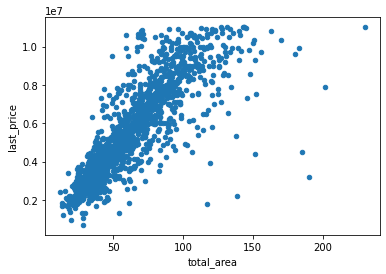

In [24]:
data.pivot_table(index='total_area', values='last_price', aggfunc='median').reset_index().plot(kind='scatter', y='last_price', x='total_area')

Есть прямая взаимосвязь между ценой и площадью продаваемых квартир.

##### Зависимость цены от жилой площади:

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

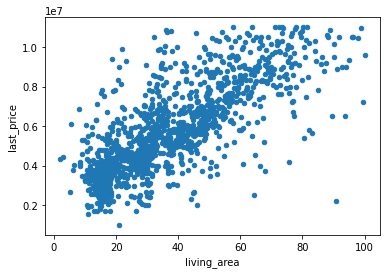

In [25]:
data.pivot_table(index='living_area', values='last_price', aggfunc='median').reset_index().plot(kind='scatter', y='last_price', x='living_area')

Есть слабая зависимость цены от жилой площади.

##### Зависимость цены от площади кухни:

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

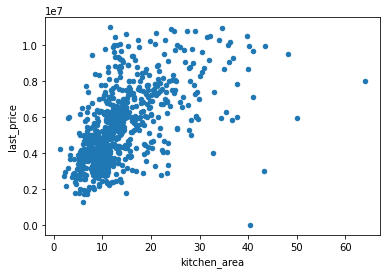

In [26]:
data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').reset_index().plot(kind='scatter', y='last_price', x='kitchen_area')

Есть слабая зависимость между ценой и площадью кухни.

##### Зависимость цены от количества комнат:

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

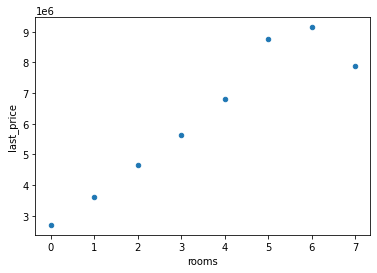

In [27]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index().plot(kind='scatter', y='last_price', x='rooms')

Чем больше комнат - тем больше стоимость квартиры.

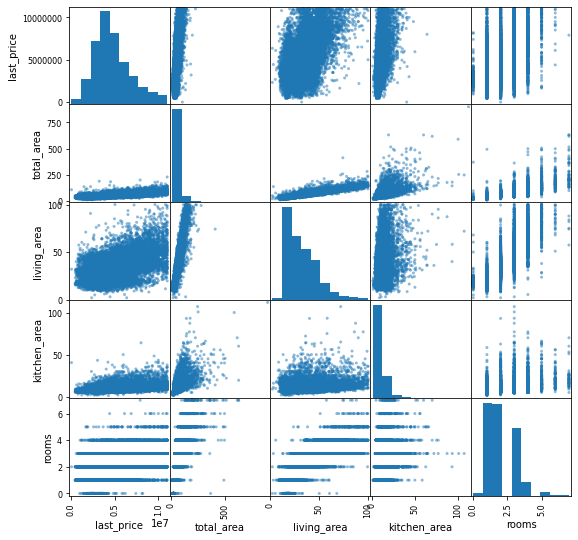

In [28]:
# добавим расчет матрицы диаграмм рассеяниядля цены, общей площади, жилой площади, площади кухни и количества комнат
pivot_table = data[['last_price','total_area','living_area','kitchen_area','rooms']]

pd.plotting.scatter_matrix(pivot_table, figsize=(9, 9)); 

Диаграмма рассеяния наглядно подтверждает, что наиболее значимым фактором, влияющим на стоимость квартиры, является общая площадь квартиры.

In [29]:
# добавим расчет корреляции для цены, общей площади, жилой площади, площади кухни и количества комнат методом Пирсона
print('Корреляция между ценой и общей площадью равна', data['total_area'].corr(data['last_price']))
print('Корреляция между ценой и жилой площадью равна', data['living_area'].corr(data['last_price']))
print('Корреляция между ценой и площадью кухни равна', data['kitchen_area'].corr(data['last_price']))
print('Корреляция между ценой и количеством комнат равна', data['rooms'].corr(data['last_price']))

Корреляция между ценой и общей площадью равна 0.6848407387240477
Корреляция между ценой и жилой площадью равна 0.5699175279545261
Корреляция между ценой и площадью кухни равна 0.4697897258125541
Корреляция между ценой и количеством комнат равна 0.44709929785800967


Коэффициент Пирсона подтверждает линейную пропорциональную взаимосвязь между ценой квартир и общей площадью. Остальные факторы на стоимость квартиры влияют слабо.

##### Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

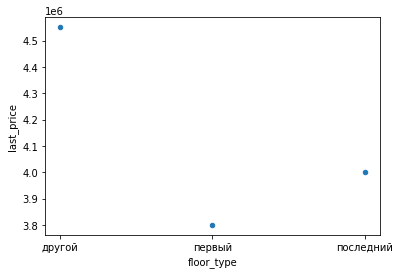

In [30]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').reset_index().plot(kind='scatter', y='last_price', x='floor_type')

Квартиры на первом и последнем этажах существенно дешевле квартир, расположенных на других этажах.

##### Зависимость цены от даты размещения (день недели):

<AxesSubplot:xlabel='day_of_publication', ylabel='last_price'>

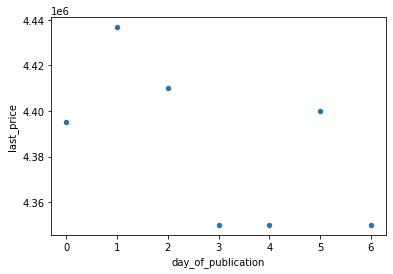

In [31]:
data.pivot_table(index='day_of_publication', values='last_price', aggfunc='median').reset_index().plot(kind='scatter', y='last_price', x='day_of_publication')

Со вторника по воскресенье есть обратная связь между днем недели и стоимостью квартир.

##### Зависимость цены от даты размещения (месяц):

<AxesSubplot:xlabel='month_of_publication', ylabel='last_price'>

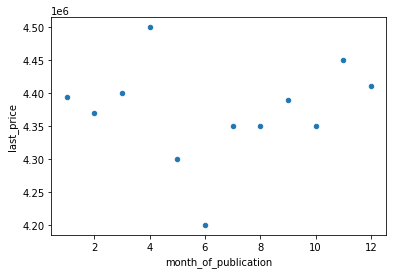

In [32]:
data.pivot_table(index='month_of_publication', values='last_price', aggfunc='median').reset_index().plot(kind='scatter', y='last_price', x='month_of_publication')

Месяц размещения объявления практически не влияет на стоимость квартир.

##### Зависимость цены от даты размещения (год):

<AxesSubplot:xlabel='year_of_publication', ylabel='last_price'>

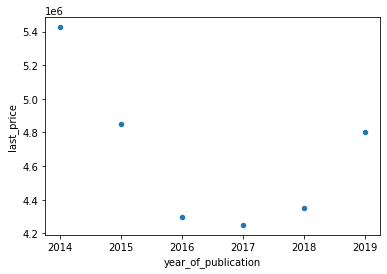

In [33]:
data.pivot_table(index='year_of_publication', values='last_price', aggfunc='median').reset_index().plot(kind='scatter', y='last_price', x='year_of_publication')

Есть прямая зависимость, начиная с 2017 года. Вероятнее всего связано с ростом стоимости квартир и низкой процентной ипотечной ставкой. 

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

In [34]:
#Посчитайте среднюю цену одного квадратного метра в каждом населенном пункте. 
average_price_kv_m = data.pivot_table(index = 'locality_name', values = 'price_of_one_square_meter', aggfunc = ['count','mean'])
average_price_kv_m.columns = ['count','mean']

# сохраним в переменной average_price_kv_m 10 населённых пунктах с наибольшим числом объявлений. 
average_price_kv_m = average_price_kv_m.sort_values('count', ascending = False).head(10)

#населённый пункт с самой высокой стоимостью квадратного метра.
print(average_price_kv_m[average_price_kv_m['mean'] == average_price_kv_m['mean'].max()])

#населённый пункт с самой низкой стоимостью квадратного метра.
print(average_price_kv_m[average_price_kv_m['mean'] == average_price_kv_m['mean'].min()])


                 count           mean
locality_name                        
санкт-петербург  13522  104996.010402
               count          mean
locality_name                     
выборг           236  57932.878606


Населённый пункт с самой высокой стоимостью квадратного метра - это Санкт-Петербург, а с самой низкой стоимостью квадратного метра - Выборг.

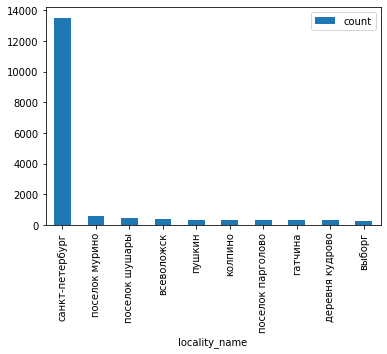

In [35]:
#построим график для визуализации результатов поиска 10 населённых пунктах с наибольшим числом объявлений.
average_price_kv_m.plot(y='count', kind='bar');

#### Вычислим, как стоимость объектов зависит от расстояния до центра города:

In [36]:
#выделяем квартиры в Санкт-Петербурге с помощью столбца locality_name и вычисляем среднюю цену каждого километра. 
data[data['locality_name'] == 'санкт-петербург'].pivot_table(index = 'cityCenters_nearest_km', values = 'price_of_one_square_meter', aggfunc = 'mean')

,price_of_one_square_meter
cityCenters_nearest_km,
0.0,111238.536316
1.0,116983.691119
2.0,112646.592032
3.0,109256.686490
4.0,112967.753775
5.0,119091.589106
6.0,121424.166312
7.0,115810.758865
8.0,114851.519488


Стоимость объектов обратна пропорциональна расстоянию до центра города.

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='price_of_one_square_meter'>

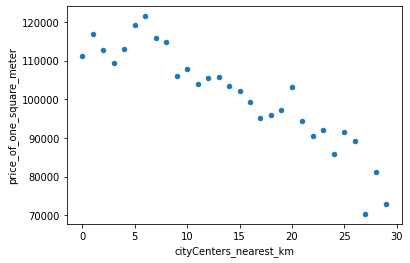

In [37]:
# рассчитаем сколько км составляет центр города 
data[data['locality_name'] == 'санкт-петербург'].pivot_table(index = 'cityCenters_nearest_km', values = 'price_of_one_square_meter', aggfunc = 'mean').reset_index().plot(kind='scatter', y='price_of_one_square_meter', x='cityCenters_nearest_km')

Судя по графику стоимости квартир, центр города Санкт-Петербурга находится в пределах 5 км от нулевой точки, поскольку цены находятся в определенном диапазоне и не зависят от удаленности от нулевой точки. Квартиры, находящиеся за пределами центра города (или 5 км), снижаются в стоимости в зависимости от удаленности от центра.

### Общий вывод

Таким образом, типичная квартира для продажи обладает следующими параметрами: 
1. Общая площадь от 40 до 69 квадратных метров.  
2. Жилая площадь от 18 до 42 квадратных метров. 
3. Площадь кухни от 6 до 12 квадратных метров. 
4. Стоимость от 1,21 млн до 5,95 млн рублей. 
5. Количество комнат от 1 до 3. 
6. Высота потолков от 2,6 до 2,7 метров.
7. Находится с 2 по 8 этаж. 
8. Находится на этаже, отличном от первого и последнего.
9. Находится в 5-этажных домах, на втором месте в 9-этажных домах. 
10. Удаленность от центра города составляет от 9,2 до 16,2 км. 
11. Удаленность от аэропорта у большинства продаваемых квартир составляет от 18 до 38 км. 
12. В пределах 612 метров есть парк.
13. Квартиры на первом и последнем этажах существенно дешевле квартир, расположенных на других этажах.

Объявления о продаже квартир чаще всего появляются в будние дни.
Объявления о продаже квартир чаще всего публикуются в период с февраля по апрель и с сентября по ноябрь.
Квартиры продаются в диапазоне от 45 до 232 дней. При этом продажи меньше 45 дней можно считать быстрыми, а свыше 232 дней необычно долгими.

Также было установлено, что цена объекта находится в прямой зависимости с площадью продаваемых квартир, количеством комнат, годом публикации объявления, начиная с 2017 года, а также в обратной зависимости с днем недели (за исключением понедельника),	расстоянием до центра города.

Коэффициент Пирсона подтверждает линейную пропорциональную взаимосвязь между ценой квартир и общей площадью. Остальные факторы на стоимость квартиры влияют слабо.

Населённый пункт с самой высокой стоимостью квадратного метра - это Санкт-Петербург, а с самой низкой стоимостью квадратного метра - Выборг.

Квартиры, находящиеся за пределами центра города Санкт-Петербург (или 5 км), снижаются в стоимости в зависимости от удаленности от центра.